In [228]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import Flatten,Dense
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [229]:
df=pd.read_csv('Churn_Modelling.csv')

In [230]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [231]:
X=df.drop(labels=["RowNumber","CustomerId","Surname","Exited"],axis=1)
y=df["Exited"]
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [232]:
#Encoding the NON-numerical values
from sklearn.preprocessing import LabelEncoder
l1,l2=LabelEncoder(),LabelEncoder()
X['Geography'],X['Gender']=l1.fit_transform(X['Geography']),l2.fit_transform(X['Gender'])

In [233]:
X.head()


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,0,0,42,2,0.00,1,1,1,101348.88
1,608,2,0,41,1,83807.86,1,0,1,112542.58
2,502,0,0,42,8,159660.80,3,1,0,113931.57
3,699,0,0,39,1,0.00,2,0,0,93826.63
4,850,2,0,43,2,125510.82,1,1,1,79084.10


In [234]:
X=pd.get_dummies(X,drop_first=True,columns=['Geography'])
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0,stratify=y)


In [235]:
X_train

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_1,Geography_2
493,531,0,47,6,0.00,1,0,0,194998.34,0,0
6839,724,1,36,6,94615.11,2,1,1,10627.21,1,0
170,484,0,29,4,130114.39,1,1,0,164017.89,0,0
4958,655,1,37,6,109093.41,2,1,0,1775.52,0,0
4271,465,1,33,5,0.00,2,0,1,78698.09,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6727,745,0,36,9,0.00,1,1,0,19605.18,0,0
4674,850,1,41,1,176958.46,2,0,1,125806.30,1,0
6399,601,1,48,9,163630.76,1,0,1,41816.49,1,0
872,722,0,35,2,163943.89,2,1,1,15068.18,0,0


In [236]:
##Feature Standardization:::sclaing up/down the i/p features where the variation isn't that low

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

X_train



array([[-1.24021723, -1.09665089,  0.77986083, ...,  1.64099027,
        -0.57812007, -0.57504086],
       [ 0.75974873,  0.91186722, -0.27382717, ..., -1.55587522,
         1.72974448, -0.57504086],
       [-1.72725557, -1.09665089, -0.9443559 , ...,  1.1038111 ,
        -0.57812007, -0.57504086],
       ...,
       [-0.51484098,  0.91186722,  0.87565065, ..., -1.01507508,
         1.72974448, -0.57504086],
       [ 0.73902369, -1.09665089, -0.36961699, ..., -1.47887193,
        -0.57812007, -0.57504086],
       [ 0.95663657,  0.91186722, -1.32751517, ...,  0.50945854,
        -0.57812007,  1.73900686]])

In [237]:
##Building ANN

model=Sequential()
model.add(Dense(X.shape[1],activation='relu',input_dim=X.shape[1]))
model.add(Dense(500,activation='relu'))

model.add(Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_28 (Dense)             (None, 11)                132       
_________________________________________________________________
dense_29 (Dense)             (None, 500)               6000      
_________________________________________________________________
dense_30 (Dense)             (None, 1)                 501       
Total params: 6,633
Trainable params: 6,633
Non-trainable params: 0
_________________________________________________________________


In [238]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=["accuracy"])


In [239]:
history=model.fit(X_train,y_train.to_numpy(),batch_size=5,epochs=8,verbose=1,validation_split=0.2)

Train on 6400 samples, validate on 1600 samples
Epoch 1/8
6400/6400 [==============================] - 6s 909us/sample - loss: 0.4375 - accuracy: 0.8172 - val_loss: 0.3785 - val_accuracy: 0.8381
Epoch 2/8
6400/6400 [==============================] - 5s 815us/sample - loss: 0.3704 - accuracy: 0.8477 - val_loss: 0.3669 - val_accuracy: 0.8462
Epoch 3/8
6400/6400 [==============================] - 5s 824us/sample - loss: 0.3500 - accuracy: 0.8591 - val_loss: 0.3429 - val_accuracy: 0.8575
Epoch 4/8
6400/6400 [==============================] - 5s 826us/sample - loss: 0.3464 - accuracy: 0.8594 - val_loss: 0.3356 - val_accuracy: 0.8625
Epoch 5/8
6400/6400 [==============================] - 5s 833us/sample - loss: 0.3416 - accuracy: 0.8597 - val_loss: 0.3315 - val_accuracy: 0.8706
Epoch 6/8
6400/6400 [==============================] - 5s 810us/sample - loss: 0.3373 - accuracy: 0.8605 - val_loss: 0.3373 - val_accuracy: 0.8687
Epoch 7/8
6400/6400 [==============================] - 5s 832us/sample

In [240]:
y_pred=model.predict_classes(X_test)

In [241]:
model.evaluate(X_test,y_test.to_numpy())

2000/2000 [==============================] - 0s 131us/sample - loss: 0.3533 - accuracy: 0.8515


[0.3532917339801788, 0.8515]

In [242]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [243]:
confusion_matrix(y_test,y_pred)

array([[1500,   93],
       [ 204,  203]])

In [244]:
#WTF IS A COnfusion matrix
##It's a matrix that describes our ml model prediction and actual data
##Here the outcome is will leave won't leave
##The format will be

#P-positive,N-negative

# -------ACTUAL--------
# |       P    N
# |    P|1535|58__|         
# pred N|_230|177_|
# |
# |

In [245]:
accuracy_score(y_test,y_pred)

0.8515

In [246]:
import matplotlib.pyplot as plt

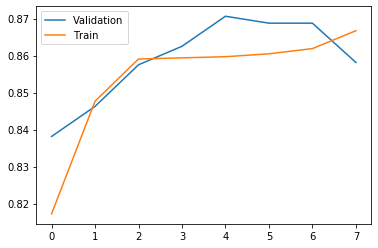

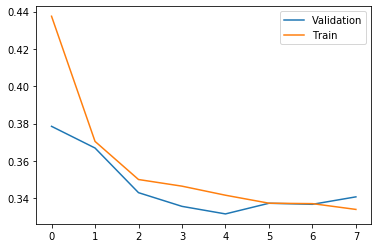

In [247]:
plt.plot(history.history["val_accuracy"])
plt.plot(history.history["accuracy"])
plt.legend(["Validation","Train"])
plt.show()
plt.plot(history.history["val_loss"])
plt.plot(history.history["loss"])
plt.legend(["Validation","Train"])
plt.show()

In [133]:
history.history

{'loss': [0.43219644982600586,
  0.36884871746442516,
  0.35190933001867963,
  0.3452232980329427,
  0.34133773323264904],
 'accuracy': [0.816875, 0.8490625, 0.8575, 0.8590625, 0.85984373],
 'val_loss': [0.3723425719188526,
  0.3458063798723742,
  0.34720455850474535,
  0.3491842611168977,
  0.33737793541513383],
 'val_accuracy': [0.83875, 0.860625, 0.8625, 0.85, 0.86]}

(<Figure size 576x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7feba411c090>)

findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.


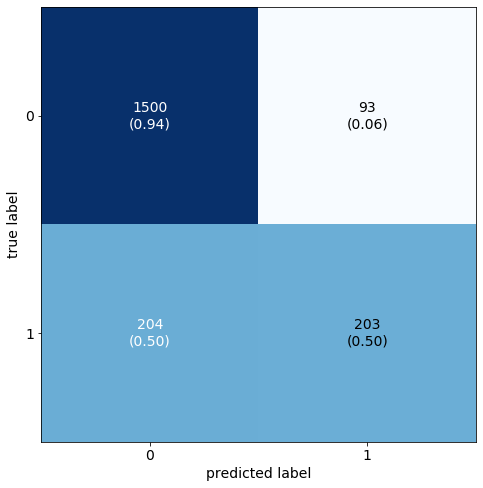

In [249]:
#Plotting ze confusion matrix


from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
import matplotlib

font={
    'family':'Helvetica',
    'size':14
}

matplotlib.rc('font',**font)
mat=confusion_matrix(y_test,y_pred)
plot_confusion_matrix(conf_mat=mat,figsize=(8,8),show_normed=True)